# Assignment 1

**Situation**: To get familiar with data analysis and visualizarion techniques.\
**Dataset**: weights-heights.csv,  containing height, weight & gender \
**Tasks**:

1.   Visualize the data by creating scatter plots of the data. Write your observations about the data.
2.   Do One Hot Encoding of the nominal predictor. How many predictors do you have now?
3.   Apply Standardization to real value predictors.
4.   Create scatter plots of the transformed data. Write your observations about the data.
5. Create heat map to visualize the correlation between all variable pairs.
6. There are no missing values in this data. Randomly delete some of the data and apply various methods to handle missing values.
7. Identify skewness in the data and apply transformation if required.
8. Does the data have outliers? Identify and remove outliers.
9. Transform height into Short, Medium and Tall categories using equal frequency and equal width bins. Write your observations.

## 1. Visualization
\
Firstly loading the data and viewing the first 5 entries.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# loading the dataset, note pandas is used to load csv file
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,NaN
3,Male,71.730978,NaN
4,Male,69.881796,NaN


In [2]:
# Observe shape of dataset, note shape is not a method

print(df.shape)     

(10000, 3)


In [3]:
# Count the missing values in dataset, 

# df.isnull() returns a dataframe of the same shape as df, 
# but with True and False values, True in place of Null values, all else are false.
# .sum() returns the sum columnwise. Boolean True is treated as 1.

df.isnull().sum()   

Gender    47
Height    70
Weight    82
dtype: int64

In [4]:
df.info()           # To see the datatypes and the count of non-null values columnwise

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  9953 non-null   object 
 1   Height  9930 non-null   float64
 2   Weight  9918 non-null   float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


**Observations**
1. The dataset has 10000 rows of 3 columns each. This means we have 10000 feature vectors of 3 features each.
2. There are missing values in all the columns, but the missing values are very less as compared to the non-null values.
3. Height and Weight are stored as float64 numbers, but Gender has categorical values.


As the null values are very less in number as compared to the non-values. We can use dropping the rows in order to handle null values.
- We drop the rows in Gender column, because categorical missing values do not make much sense in scatter plot
- But keep the ones with numerical missing values. **Because scatter plot can handle missing values.**

In [5]:
''' 
For dropping the rows with null value, we will have to mark those rows.
.isnull() marks all null values as True. ~ negates it.
Hence, to mark all non-null values in Gender as True, we have to.
~df['Gender'].isnull() 

Now to drop all the values marked as false in above, i.e. null values 
df[~df['Gender'].isnull()]
''';

In [6]:
# Dropping rows with missing values in Gender column

dfNew = df[~df['Gender'].isnull()]
print(dfNew.isnull().sum())
dfNew

Gender     0
Height    70
Weight    82
dtype: int64


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,NaN
3,Male,71.730978,NaN
4,Male,69.881796,NaN
...,...,...,...
9993,Female,60.030434,97.687432
9994,Female,59.098250,110.529686
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


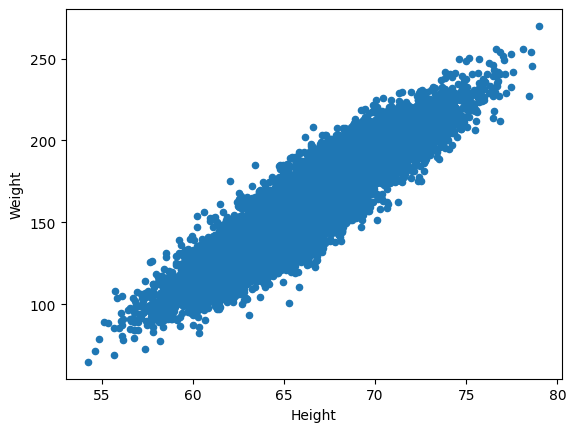

In [7]:
dfNew.plot(kind='scatter',x='Height',y='Weight')
plt.show()

**Observations**
1. Height and weight appear to be linearly dependent.
2. But we can not infer the effects of gender.

Hence we plot points belonging to different gender in different colour.

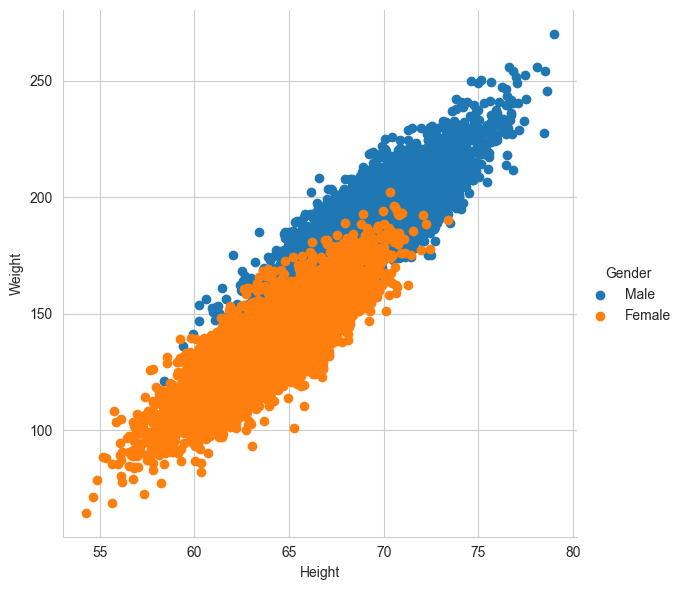

In [8]:
# using seaborn's FacetGrid with hue argument to mark Genders separately
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  #used to ignore warnings while executing

sns.set_style('whitegrid');        # sets the background grid
sns.FacetGrid(dfNew,hue='Gender',height=6)\
   .map(plt.scatter,'Height','Weight')\
   .add_legend()
plt.show()

### Final Observations
1. Height and Weight are directly proportional in both cases.
2. Points of different genders are clustered together, but there is overlap.


## 2. Do One Hot Encoding of the nominal predictor

In one hot encoding we encode the catergorical values to binary values.

In [9]:
# pd.get_dummies() converts categorical data into dummies or indicators
oheValues = pd.get_dummies(dfNew['Gender'])   # One Hot Encoding Gender 
hwValues = dfNew.drop('Gender',axis=1)
oheDF = hwValues.join(oheValues)
oheDF         # This oheDF dataframe has 4 predictor variables: Height, Weight, Female, Male

,Height,Weight,Female,Male
0,73.847017,241.893563,0,1
1,68.781904,162.310473,0,1
2,74.110105,NaN,0,1
3,71.730978,NaN,0,1
4,69.881796,NaN,0,1
...,...,...,...,...
9993,60.030434,97.687432,1,0
9994,59.098250,110.529686,1,0
9997,63.867992,128.475319,1,0
9998,69.034243,163.852461,1,0


### We have 4 predictors now
1. Height
2. Weight
3. Female
4. Male


## 3. Apply Standardization to real value predictors

Standardization and normalization are techniques of **feature scaling**. Feature scaling is important data pre-processing step in ML. It scales the features such that the features with larger values do not overpower the ones with smaller ranges.

- Standardization: Mean-Std dev scaling
- Normalization: Min-max scaling


| # |  Normalization                                          | Standardization                                           |
|---|---------------------------------------------------------|-----------------------------------------------------------|
| 1 | Minimum & Maximum values of features, used for scaling. | Mean and std deviation is used for scaling.               |
| 2 | Used when features are of different scale.              | Used when we want to ensure zero mean and unit deviation. |
| 3 | Scales values between [0,1] or [-1,1].                  | Not bound to a certain range.                             |
| 4 | Affected by outliers.                                   | Much less affected by outliers .                          |
| 5 | Scikit learn provides a tranformer called MinMaxScaler. | Scikit learn provides a transformer called StandardScaler.|





In [37]:
# # Applying Normalization
# from sklearn.preprocessing import MinMaxScaler
# scale = MinMaxScaler()
# scale.fit(oheDF)
# scaledDF = scale.transform(oheDF)
# scaledDF = pd.DataFrame(scaledDF, columns=oheDF.columns)

# scaledDF = scaledDF[['Height','Weight']].join(oheDF[['Male','Female']])



# Applying Standardization
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(oheDF)
standardDF = scale.transform(oheDF)
standardDF = pd.DataFrame(standardDF, columns=oheDF.columns)

standardDF = standardDF[['Height','Weight']].join(oheDF[['Male','Female']])



# scaledDF    # normalized
standardDF  # standardized

,Height,Weight,Male,Female
0,1.942295,2.514072,1.0,0.0
1,0.626277,0.032993,1.0,0.0
2,2.010651,NaN,1.0,0.0
3,1.392506,NaN,1.0,0.0
4,0.912051,NaN,1.0,0.0
...,...,...,...,...
9948,-1.647531,-1.981693,0.0,1.0
9949,-1.889731,-1.581323,0.0,1.0
9950,-0.650456,-1.021851,0.0,1.0
9951,0.691840,0.081066,0.0,1.0


## 4. Scatter Plot of transformed data

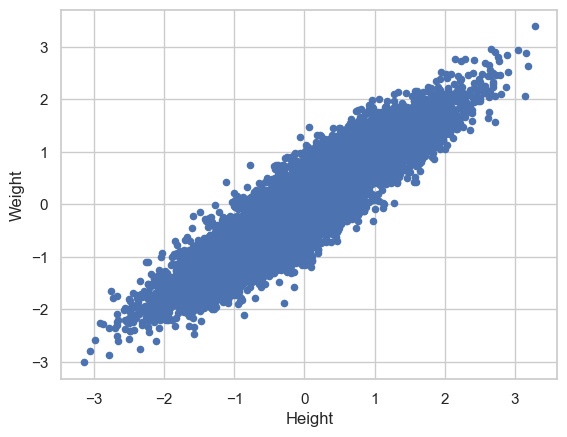

In [38]:
standardDF.plot(kind='scatter',x='Height',y='Weight')
plt.show()

## 5. Create heat map to visualize correlation between all variable pairs

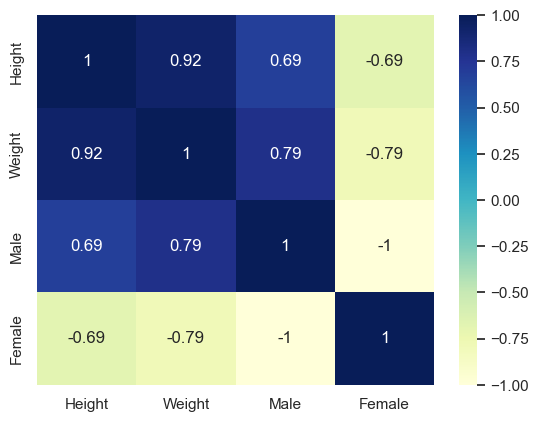

In [39]:
import seaborn as sb
import matplotlib.pyplot as plt
dataplot = sb.heatmap(standardDF.corr(), cmap="YlGnBu", annot=True)
plt.show()

## 6. Handling Missing values

We saw earlier that there are missing values in dataset. We also saw that the number of missing values is less.

To handle the missing values: 
1. we can delete all null rows
2. we call fill missing values with mean

In [42]:
standardDF.isnull().sum()  # we can see that there are missing values in both height and weight columns

Height    70
Weight    82
Male      34
Female    34
dtype: int64

In [43]:
# Dropping rows with missing values
df1 = standardDF.dropna(axis=0)
df1

,Height,Weight,Male,Female
0,1.942295,2.514072,1.0,0.0
1,0.626277,0.032993,1.0,0.0
5,0.229041,-0.281832,1.0,0.0
6,0.627103,0.706937,1.0,0.0
7,0.513674,0.209469,1.0,0.0
...,...,...,...,...
9948,-1.647531,-1.981693,0.0,1.0
9949,-1.889731,-1.581323,0.0,1.0
9950,-0.650456,-1.021851,0.0,1.0
9951,0.691840,0.081066,0.0,1.0


In [44]:
# Filling missing values with mean
standardDF['Height'] = standardDF['Height'].fillna(standardDF['Height'].mean())
standardDF['Weight'] = standardDF['Weight'].fillna(standardDF['Weight'].mean())
standardDF

,Height,Weight,Male,Female
0,1.942295,2.514072e+00,1.0,0.0
1,0.626277,3.299280e-02,1.0,0.0
2,2.010651,1.612416e-16,1.0,0.0
3,1.392506,1.612416e-16,1.0,0.0
4,0.912051,1.612416e-16,1.0,0.0
...,...,...,...,...
9948,-1.647531,-1.981693e+00,0.0,1.0
9949,-1.889731,-1.581323e+00,0.0,1.0
9950,-0.650456,-1.021851e+00,0.0,1.0
9951,0.691840,8.106579e-02,0.0,1.0


## 7. Identify skewness in the data and apply transformation if needed

Using the dataframe where null values were replaced by mean

In [47]:
standardDF.skew(axis = 0, skipna = True)

Height    0.047735
Weight    0.039398
Male     -0.006655
Female    0.006655
dtype: float64

Very little skewness, hence no need for transformation

## 8. Does the data have outliers? Identify and remove them

In [48]:
dfNumFeatures = standardDF.select_dtypes(include=np.number)
Q1 = dfNumFeatures.quantile(0.25)
Q3 = dfNumFeatures.quantile(0.75)
IQR = Q3 - Q1
print(IQR)   # Gives Inter Quartile range of each column

Height    1.459029
Weight    1.588180
Male      1.000000
Female    1.000000
dtype: float64


In [49]:
outlier = pd.DataFrame(
    (dfNumFeatures < (Q1 - 1.5*IQR)) | (dfNumFeatures > (Q3 + 1.5*IQR)))

outliers = {'height outliers': outlier['Height'].value_counts()[True],
'weight outlier':outlier['Weight'].value_counts()[True]}

outliers   # Outliers in categorical variable are zero

{'height outliers': 8, 'weight outlier': 1}

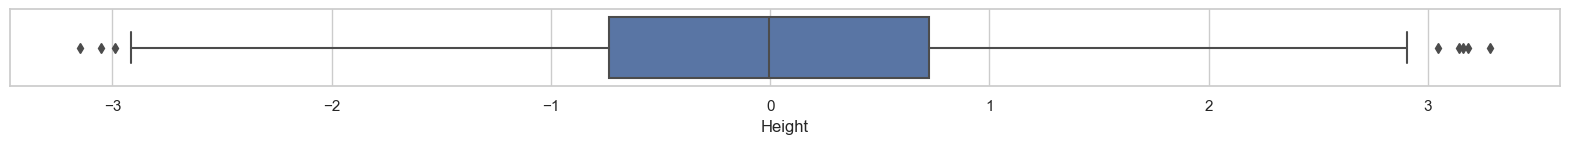

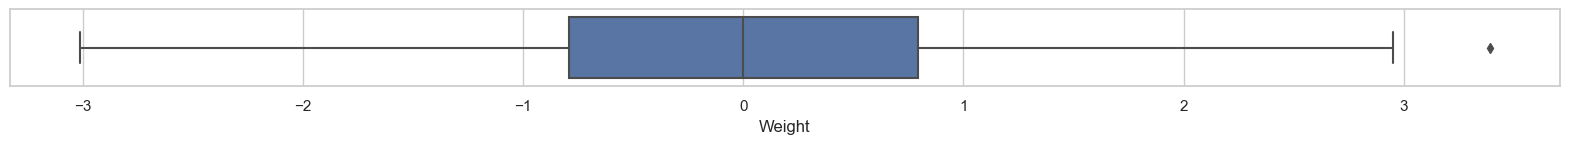

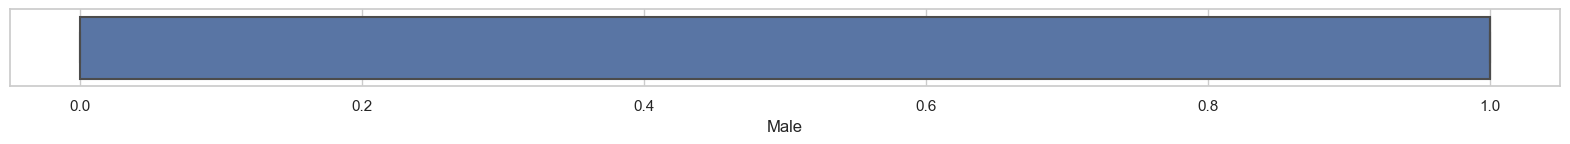

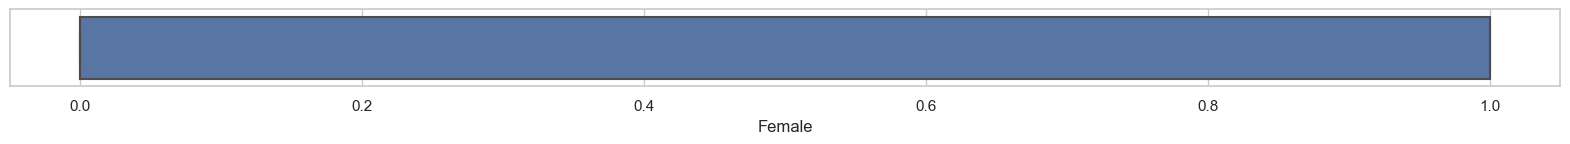

In [50]:
# Visualizing outliers using Boxplots
for column in enumerate(dfNumFeatures):
    plt.figure(figsize=(20,1))
    sb.set_theme(style="whitegrid")
    sb.boxplot(x=column[1], data= dfNumFeatures)
    plt.xlabel(column[1],fontsize=12)
    plt.show()

## 9. Transforming using equal frequency and equal width bins

In [51]:
def equifreq(arr1, m):     
    a = len(arr1)  
    n = int(a / m)  
    for i in range(0, m):  
        arr = []  
        for j in range(i * n, (i + 1) * n):  
            if j >= a:  
                break  
            arrarr = arr + [arr1[j]]  
        print(arr)  
    
def equiwidth(arr1, m):  
    a = len(arr1)  
    w = int((max(arr1) - min(arr1)) / m)  
    minmin1 = min(arr1)  
    arr = []  
    for i in range(0, m + 1):  
        arrarr = arr + [min1 + w * i]  
    arri=[]  
       
    for i in range(0, m):  
        temp = []  
        for j in arr1:  
            if j >= arr[i] and j <= arr[i+1]:  
                temp += [j]  
        arri += [temp]  
    print(arri)  
     
     

In [52]:
scaledDF

,Height,Weight,Male,Female
0,0.791728,0.863139,1.0,0.0
1,0.586958,0.475476,1.0,0.0
2,0.802364,NaN,1.0,0.0
3,0.706182,NaN,1.0,0.0
4,0.631424,NaN,1.0,0.0
...,...,...,...,...
9948,0.233158,0.160687,0.0,1.0
9949,0.195472,0.223243,0.0,1.0
9950,0.388301,0.310660,0.0,1.0
9951,0.597160,0.482988,0.0,1.0
